# 1st DATA SET

* There is online course we paid monthly subscribtion but we quit after 3 instalment this is called trun rate
* trun rate=totol particparton - left the people
* same as it is of there is company then it will check out what are the business matrics
* how we can improve the heath of business
* we set the bentch mark of business matic and check it is less or more 
* we have e-commerce website and give score
* this is nps data net promotive score
* every business company have its own matric and engage it.
* business martics are time based mean daily,weekly and monthly.....
* depend on the company.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
nps=pd.read_csv("nps.csv")
nps.head()

In [ ]:
nps.info()

* so we event_date colum that is time base so, convert the data type

In [ ]:
nps=pd.read_csv("nps.csv",parse_dates=["event_date"])
nps.head()

In [ ]:
nps.info()

In [ ]:
# nps["event_date"]=pd.to_datetime(nps["event_date"])

In [ ]:
nps.shape

# we have 3 types of customer that gives rating
1. Detractors       ---------------- give negative opinion on facebook, rider deliver wrong order
2. Passives         ----------------  not neagtive not positive
3. Promoters        ---------------- that promote the business   

# **nps = Promoters% - Detractors%**

we have to calculte this nps in this project, its answer can be positive and negative, now we have to decide we have to calculate it in day wise or monthly, so decided we calculate nps monthly base ,we set the critaria and we work monthly

In [ ]:
print(nps.head(4))
print(nps.tail(4))

**year-month-date**

In [ ]:
years=nps["event_date"].dt.year
years

In [ ]:
months=nps["event_date"].dt.month
months

**combine years and month in this formate**
# 202001
# 202012

202000+01
202001

In [ ]:
year_month=(years*100)+months

In [ ]:
year_month

In [ ]:
nps["yearmonth"]=year_month

In [ ]:
nps.head(3)

In [ ]:
feb_bol=nps["yearmonth"]==202002
nps[feb_bol]
#feb month start

**we have to calculate promoter and passive monthwise so  make group**
* before group we define defination of nps
* Detractors ---------------- give negative opinion on facebook, rider deliver wrong order  (0-6)
* Passives ---------------- not neagtive not positive (7-8)
* Promoters ---------------- that promote the business(9-10)
* so we need to make function for a category.

In [ ]:
nps["score"].unique()

In [ ]:
def cat(score):
    if score in range(0,7): #you cab give list as well
        return "Detractors"
    elif score in [7,8]:
        return "Passives"
    else:
        return "Promoters" 

In [ ]:
nps["score"].apply(cat)

In [ ]:
nps["score"].map(cat)

In [ ]:
nps["catagory"]=nps["score"].map(cat)

In [ ]:
nps.head(4)

In [ ]:
nps[["score","catagory"]]

In [ ]:
nps.head()

In [ ]:
nps[nps["yearmonth"]<=202001]

* total 328 rows
* for example
* "Detractors" 100
* "Passives"  70
* "Promoters" 328-170=158

**formula**
# **nps = Promoters% - Detractors%**
* nps=(158-100)/328
* nps=(158/328)-(100/328)

# now we make group

In [ ]:
nps.groupby(["yearmonth","catagory"])

In [ ]:
nps.groupby(["yearmonth","catagory"]).size()
#this is hararical indexing, this is deficult to manage

In [ ]:
print(f"for year 202001     {31+82+215}")

In [ ]:
nps.groupby(["yearmonth","catagory"]).size().loc[202001]["Passives"]

In [ ]:
nps.groupby(["yearmonth","catagory"]).size().loc[202001,"Passives"]

there is 2 type of organization
* line> ceo>manager>submanager>line man where haraical work
* functional> where we works on project and information received every where

* because above is difficult to mange
* we use pivot table
* yearmonth  Detractor  passive   Pro
* 202001       31         82      215

# pivoat table

In [ ]:
nps.pivot_table(index="yearmonth",columns="catagory",aggfunc="size")

In [ ]:
df_nps=nps.pivot_table(index="yearmonth",columns="catagory",aggfunc="size")
df_nps

**now we need vertical axis=1**

In [ ]:
df_nps.columns

In [ ]:
df_nps.sum(axis=1)
#1st method

In [ ]:
df_nps["Detractors"]+df_nps["Passives"]+df_nps["Promoters"]

In [ ]:
df_nps["Total"]=df_nps["Detractors"]+df_nps["Passives"]+df_nps["Promoters"]
df_nps
#2nd method

In [ ]:
df_nps

# new colums of nps
* nps = Promoters% - Detractors%**
* nps=(158-100)/328

In [ ]:
(df_nps["Promoters"]-df_nps["Detractors"])/df_nps["Total"]

In [ ]:
(df_nps["Promoters"]-df_nps["Detractors"])*100/df_nps["Total"]

In [ ]:
df_nps["NPS"]=(df_nps["Promoters"]-df_nps["Detractors"])*100/df_nps["Total"]

In [ ]:
df_nps.head()

# line graph used in time base data

In [ ]:
df_nps["NPS"].plot.bar()

In [ ]:
df_nps.index

In [ ]:
df_nps.reset_index(inplace=True)

In [ ]:
df_nps.head(2)

In [ ]:
df_nps.index

In [ ]:
df_nps.plot(x="yearmonth",y="NPS",kind="line")

In [ ]:
df_nps.plot(x="yearmonth",y="NPS",kind="line",title="Montly nps compairison")

In [ ]:
df_nps.plot(x="yearmonth",y="NPS",kind="line",title="Montly nps compairison",figsize=(10,10))
plt.savefig('Montly nps compairison.png')

In [ ]:
df_nps.plot(x="yearmonth",y="NPS",kind="line",title="Montly nps compairison",figsize=(5,5),legend=False)
plt.title("Montly nps compairison",y=1.05)

-------------------------------------------------------------------------------------------------------------------------------

# 2nd DATA SET

In [2]:
data=pd.read_csv("muscle_labs.csv")
data.head()

,id,customer_id,end_date,start_date,subscription_period,price
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   10497 non-null  int64 
 1   customer_id          10497 non-null  int64 
 2   end_date             10497 non-null  object
 3   start_date           10497 non-null  object
 4   subscription_period  10497 non-null  object
 5   price                10497 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 492.2+ KB


In [4]:
data=pd.read_csv("muscle_labs.csv",parse_dates=["end_date","start_date"])
data.head()

,id,customer_id,end_date,start_date,subscription_period,price
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10497 entries, 0 to 10496
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   10497 non-null  int64         
 1   customer_id          10497 non-null  int64         
 2   end_date             10497 non-null  datetime64[ns]
 3   start_date           10497 non-null  datetime64[ns]
 4   subscription_period  10497 non-null  object        
 5   price                10497 non-null  int64         
dtypes: datetime64[ns](2), int64(3), object(1)
memory usage: 492.2+ KB


**we calculate matrix on timly basic** 
* it may vary from time to time and may be seasional nps
* this is gem data. we bought this gem 1st january 2013 now we have to check the perfrom in december 2014,
* subscrbtion base busniess we calculte matric we calculate chrun rate
* we have date of future churn date as well

# Churn rate = left/ (left+existing)
15/(15+13)

# find year from churn month

In [6]:
data["end_date"]

0       2014-12-28 01:40:57
1       2014-11-19 01:48:05
2       2014-11-01 20:56:37
3       2014-12-09 02:51:57
4       2015-11-16 09:19:29
                ...        
10492   2015-01-20 13:54:39
10493   2015-01-20 13:38:29
10494   2015-01-20 10:16:19
10495   2015-01-20 18:50:56
10496   2015-01-20 20:22:43
Name: end_date, Length: 10497, dtype: datetime64[ns]

In [7]:
year=data["end_date"].dt.year
year

0        2014
1        2014
2        2014
3        2014
4        2015
         ... 
10492    2015
10493    2015
10494    2015
10495    2015
10496    2015
Name: end_date, Length: 10497, dtype: int64

In [8]:
month=data["end_date"].dt.month
month

0        12
1        11
2        11
3        12
4        11
         ..
10492     1
10493     1
10494     1
10495     1
10496     1
Name: end_date, Length: 10497, dtype: int64

In [9]:
com=(year*100)+month
com

0        201412
1        201411
2        201411
3        201412
4        201511
          ...  
10492    201501
10493    201501
10494    201501
10495    201501
10496    201501
Name: end_date, Length: 10497, dtype: int64

In [10]:
data["churn_month"]=com

In [11]:
data.head()

,id,customer_id,end_date,start_date,subscription_period,price,churn_month
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50,201412
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50,201411
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500,201411
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500,201412
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500,201511


In [12]:
churn=data.groupby("churn_month").size()
churn

churn_month
201103       8
201104      16
201105      29
201106      27
201107      37
201108      40
201109      39
201110      47
201111      45
201112     100
201201      75
201202      41
201203      43
201204      74
201205      55
201206      38
201207      54
201208      56
201209      63
201210      55
201211      45
201212      50
201301      50
201302      76
201303      70
201304      95
201305      78
201306      85
201307      84
201308      92
201309      87
201310      91
201311      73
201312      90
201401     116
201402      80
201403      67
201404      77
201405     123
201406     130
201407      88
201408     114
201409     152
201410     126
201411     159
201412    1052
201501     840
201502     576
201503     319
201504     579
201505     384
201506     553
201507     280
201508     545
201509     504
201510     650
201511     495
201512     480
dtype: int64

In [13]:
#data.pivot_table(index="churn_month",aggfunc="size")

In [14]:
type(churn)

pandas.core.series.Series

* [201101,201102----------------------------------------------------------201411]
* we need this type of list and fill the missing data 

In [15]:
df_churn=pd.DataFrame(churn,columns=["Total_churn"])
df_churn

,Total_churn
churn_month,
201103,8
201104,16
201105,29
201106,27
201107,37
201108,40
201109,39
201110,47
201111,45


In [16]:
year=list(range(2011,2015))
year

[2011, 2012, 2013, 2014]

In [17]:
months=list(range(1,13))
months

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [18]:
yearmonth=[]
for y in year:
    for m in months:
        com=(y*100)+m
        yearmonth.append(com)
        
    

In [19]:
print(yearmonth)

[201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412]


In [20]:
yearmonth[:-1]

[201101,
 201102,
 201103,
 201104,
 201105,
 201106,
 201107,
 201108,
 201109,
 201110,
 201111,
 201112,
 201201,
 201202,
 201203,
 201204,
 201205,
 201206,
 201207,
 201208,
 201209,
 201210,
 201211,
 201212,
 201301,
 201302,
 201303,
 201304,
 201305,
 201306,
 201307,
 201308,
 201309,
 201310,
 201311,
 201312,
 201401,
 201402,
 201403,
 201404,
 201405,
 201406,
 201407,
 201408,
 201409,
 201410,
 201411]

In [21]:
yearmonth=yearmonth[:-1]

In [22]:
print(yearmonth)

[201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411]


In [23]:
pd.DataFrame(data=yearmonth,columns="yearmonth")
#error

TypeError: Index(...) must be called with a collection of some kind, 'yearmonth' was passed

In [24]:
df_yearmonth=pd.DataFrame({"yearmonth":yearmonth})
df_yearmonth.head()

,yearmonth
0,201101
1,201102
2,201103
3,201104
4,201105


In [25]:
df_churn.head()

,Total_churn
churn_month,
201103,8
201104,16
201105,29
201106,27
201107,37


# now merge the data

In [26]:
pd.merge(left=df_yearmonth,right=df_churn,how="left",left_on="yearmonth",right_index=True)
#because both have dif columns then we use left_on

,yearmonth,Total_churn
0,201101,NaN
1,201102,NaN
2,201103,8.0
3,201104,16.0
4,201105,29.0
5,201106,27.0
6,201107,37.0
7,201108,40.0
8,201109,39.0
9,201110,47.0


In [27]:
df_combine=pd.merge(left=df_yearmonth,right=df_churn,how="left",left_on="yearmonth",right_index=True)
df_combine.head()

,yearmonth,Total_churn
0,201101,NaN
1,201102,NaN
2,201103,8.0
3,201104,16.0
4,201105,29.0


In [28]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yearmonth    47 non-null     int64  
 1   Total_churn  45 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


In [29]:
df_combine=df_combine.fillna(0)
df_combine

,yearmonth,Total_churn
0,201101,0.0
1,201102,0.0
2,201103,8.0
3,201104,16.0
4,201105,29.0
5,201106,27.0
6,201107,37.0
7,201108,40.0
8,201109,39.0
9,201110,47.0


In [30]:
#it will work on dataframe so where it fill empty it will fill 0
#for series i can use it as df_combine["Total_churn"].fillna(0) 

In [31]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   yearmonth    47 non-null     int64  
 1   Total_churn  47 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 880.0 bytes


# chrun rate

* churn_rate = Total_churned/(total_churned+existing)

or

* churn_rate = Total_churned/total_presence




* we find the Numenartor but find Denominator

In [32]:
data.head()

,id,customer_id,end_date,start_date,subscription_period,price,churn_month
0,5,1337,2014-12-28 01:40:57,2014-10-25 12:39:18,monthly,50,201412
1,28,1338,2014-11-19 01:48:05,2014-10-17 13:47:59,monthly,50,201411
2,44,1339,2014-11-01 20:56:37,2014-10-30 05:50:54,annual,500,201411
3,85,1340,2014-12-09 02:51:57,2013-12-05 14:51:57,annual,500,201412
4,168,1341,2015-11-16 09:19:29,2014-11-13 20:19:23,annual,500,201511


* we have 2 colum start and end date and can find how many customer
* defination change with the passage of time
* to find this we need date
* dt.datetime(y,m,d0

In [33]:
d=201412
y=d//100
y

2014

In [34]:
m=d-y*100
m

12

In [35]:
print(y,m)

2014 12


In [36]:
import datetime as dt

In [37]:
dt.datetime(y,m,1)
#now we can compaire all values and for this we need a function

datetime.datetime(2014, 12, 1, 0, 0)

# now we can check january 2010 my kitny log thy

In [38]:
start=data["start_date"]
end=data["end_date"]

* condition 1
* start < date >if i left after my start date then i will count from  start, i will get true false i will sum them
* condition 2
* date <= end  > end of month mean next month 

* in simple when i left then how many people before and when i left how many people that time , we need to compaire condition


Start 31  March,2021 10
date April,2021
end  18 April,2021 5


In [39]:
def total_member(ym):
    d=ym
    y=d//100
    m=d-y*100
    
    #import datetime as dt
    date=dt.datetime(y,m,1)
    
    start=data["start_date"]
    end=data["end_date"]
    
    bol=(start < date) & (date <= end)
    
    return bol.sum()
    

In [40]:
total_member(201101)

0

In [41]:
total_member(201105)

105

In [42]:
total_member(201106)

155

In [43]:
df_combine.head()

,yearmonth,Total_churn
0,201101,0.0
1,201102,0.0
2,201103,8.0
3,201104,16.0
4,201105,29.0


In [44]:
df_combine["yearmonth"].apply(total_member)

0        0
1       17
2       47
3       82
4      105
5      155
6      194
7      220
8      247
9      254
10     273
11     341
12     299
13     334
14     384
15     437
16     427
17     480
18     515
19     538
20     546
21     591
22     586
23     607
24     634
25     752
26     775
27     869
28     882
29    1018
30    1063
31    1111
32    1142
33    1221
34    1314
35    1412
36    1598
37    2004
38    2426
39    2809
40    3385
41    3751
42    4150
43    4521
44    5038
45    5599
46    6290
Name: yearmonth, dtype: int64

In [45]:
df_combine["totalmembers"]=df_combine["yearmonth"].apply(total_member)

In [46]:
df_combine.head()

,yearmonth,Total_churn,totalmembers
0,201101,0.0,0
1,201102,0.0,17
2,201103,8.0,47
3,201104,16.0,82
4,201105,29.0,105


In [47]:
df_combine["Total_churn"]/df_combine["totalmembers"]

0          NaN
1     0.000000
2     0.170213
3     0.195122
4     0.276190
5     0.174194
6     0.190722
7     0.181818
8     0.157895
9     0.185039
10    0.164835
11    0.293255
12    0.250836
13    0.122754
14    0.111979
15    0.169336
16    0.128806
17    0.079167
18    0.104854
19    0.104089
20    0.115385
21    0.093063
22    0.076792
23    0.082372
24    0.078864
25    0.101064
26    0.090323
27    0.109321
28    0.088435
29    0.083497
30    0.079022
31    0.082808
32    0.076182
33    0.074529
34    0.055556
35    0.063739
36    0.072591
37    0.039920
38    0.027617
39    0.027412
40    0.036337
41    0.034657
42    0.021205
43    0.025216
44    0.030171
45    0.022504
46    0.025278
dtype: float64

In [48]:
df_combine["churn_rate"]=df_combine["Total_churn"]/df_combine["totalmembers"]

In [49]:
df_combine.head()

,yearmonth,Total_churn,totalmembers,churn_rate
0,201101,0.0,0,NaN
1,201102,0.0,17,0.000000
2,201103,8.0,47,0.170213
3,201104,16.0,82,0.195122
4,201105,29.0,105,0.276190


# to draw the draph we place 0 in NAN values to make good graph

In [50]:
df_combine.fillna(0,inplace=True)
df_combine.head()

,yearmonth,Total_churn,totalmembers,churn_rate
0,201101,0.0,0,0.000000
1,201102,0.0,17,0.000000
2,201103,8.0,47,0.170213
3,201104,16.0,82,0.195122
4,201105,29.0,105,0.276190


<AxesSubplot:xlabel='yearmonth'>

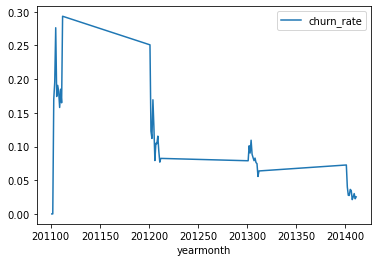

In [51]:
df_combine.plot(x="yearmonth",y="churn_rate",kind="line")

# because it increase the value on x-axis due to integer , we make it string 

In [52]:
df_combine["yearmonth"]=df_combine["yearmonth"].astype(str)

In [53]:
df_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yearmonth     47 non-null     object 
 1   Total_churn   47 non-null     float64
 2   totalmembers  47 non-null     int64  
 3   churn_rate    47 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ KB


<AxesSubplot:xlabel='yearmonth'>

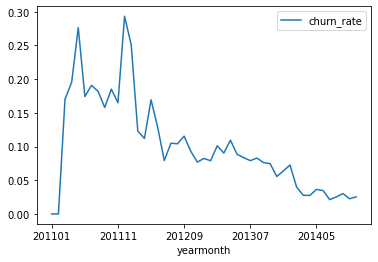

In [54]:
df_combine.plot(x="yearmonth",y="churn_rate", kind="line")

-2.3000000000000003 48.3


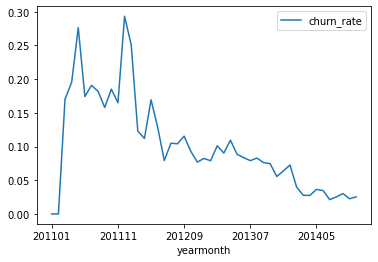

In [55]:
ax=df_combine.plot(x="yearmonth",y="churn_rate", kind="line")
strt,end=ax.get_xlim()
print(strt,end)
#it return the limit

array([-10.,   0.,  10.,  20.,  30.,  40.,  50.])

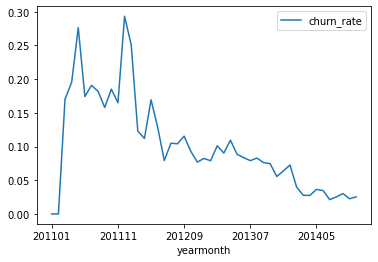

In [56]:
ax=df_combine.plot(x="yearmonth",y="churn_rate", kind="line")
ax.get_xticks()
#it return the ticks

In [57]:
from matplotlib.patches import Ellipse

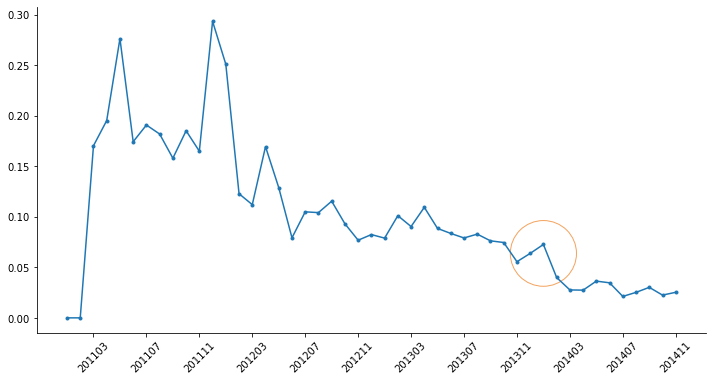

In [79]:
ax = df_combine.plot(x = "yearmonth",y = "churn_rate" , kind = "line", rot = 45, figsize = (12,6), marker = ".")
starts, end = ax.get_xlim()

#ax.get_xticks()
plt.xticks(np.arange(2,end , 4))
ax.set_xticklabels(df_combine["yearmonth"][2::4])
y = df_combine.loc[df_combine["yearmonth"]=="201312","churn_rate"].iloc[0]
x = 36
circle =  Ellipse((x,y),5,0.065, color = "sandybrown", fill = False)
ax.add_artist(circle)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
# ax.axes.get_xaxis().set_label_text("")
ax.xaxis.label.set_visible(False)
# plt.legend("")
ax.get_legend().remove()
plt.show()


In [82]:
df_combine.loc[df_combine["yearmonth"]=="201312","churn_rate"].iloc[0]

0.06373937677053824

In [84]:
df_combine.loc[df_combine["yearmonth"]=="201312","churn_rate"].loc[35]

0.06373937677053824